# Machine Learning - Task A

**Part of IAFIG-RMS *Python for Bioimage Analysis* Course.**

*M Kundegorski*

2019-12-13

In this task you will read in some toy data from an experiment and, using linear regression, try to predict the outcome for an 'unseen' or unknown measurement.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # We will use matplotlib for plotting

import pandas as pd  # We will use pandas DataFrames for storing features
import numpy as np  # We will use NumPy arrays to store image data

# Utils is a custom module written to simplify these tutorials
# You do not need to understand these codes for this practical
from utils.practice_data import generateNiceData

# Generate a pandas Dataframe with some toy results
# Each row (a cell) has four feature: A, B, C, Y
# These could, for example, be length, intensity, etc.
number_of_samples=100
problem = generateNiceData(3,number_of_samples,noNoise=True)
problem.describe()

,A,B,C,Y,Y_class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.941546,2.490668,0.515748,3.871957,0.340000
std,2.850804,1.517989,0.306020,8.011343,0.945163
min,0.000745,0.013300,0.005011,-14.326666,-1.000000
25%,2.574384,0.939395,0.246337,-1.460721,-1.000000
50%,5.192904,2.360345,0.497375,5.780579,1.000000
75%,7.013465,3.902232,0.801632,9.869845,1.000000
max,9.996295,4.988515,0.994172,19.090016,1.000000


## The Task

In one experiment we were able to measure four features: A, B, C, and Y. However, in our next experiment we could only measure A, B and C.

Given these three features (A, B and C) we want to predict the value of feature Y.

1. Let's start with a multivariate linear regression (assuming the relationship between our variables is simple).
2. Advanced: Following see how the performance changes with and without noise in data
3. Advanced: See how performance changes depending on size of the problem
4. Advanced: Then try to provide non-linear features (i.e. assuming the relationship between our variables is complex)

In [2]:
#Data from pandas series needs to be converted to familiar numpy arrays
x = problem.loc[:,['A','B','C']].values
y = problem.loc[:,'Y'].values

print(x.shape, y.shape)  # check our array shapes make sense

(100, 3) (100,)


## Task A.1 

Read the documentation for function [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), start with the second example provided.

In the cell below, complete the function call (by replacing all the `____`s) to split our dataset into 80% `x_train`/`y_train` (training) and 20% `x_test`/`y_test` (testing) subsets.

In [3]:
from sklearn import model_selection  # for trans_test_split function

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

## Task A.2

 Look at the [Linear Regression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) documentation and examples. In the code below, we have initialised a Linear Regression model. Add the following lines of code:
1. A line that 'fit's a model to our training data,
2. A line that 'predict's the value of Y for our test data.

What do the intercept and slope represent?

In [4]:
from sklearn import linear_model  # this submodule contains the 'LinearRegression' function

mv_regression = linear_model.LinearRegression(normalize=True) #How would it perform without normalisation?

# Fit regression model to feature data x_train and target y_train
mv_regression.fit(x_train,y_train)

# Fill vector y_predict with estimations of target y_predict from data x_test
y_predict = mv_regression.predict(x_test)

print("Intercept {}".format(mv_regression.intercept_))
print("Slope {}".format(mv_regression.coef_))

Intercept 11.092140568776625
Slope [ 0.97815476 -3.71902832 -4.94546362]


In machine learning we want to get an idea of how well our models fits our data (by comparing out prediction to our known testing data values), there are a variety of error metrics that can be used for this. Run the cell below to compare the 'True' or known values and the predicted values as well as three common error metrics. How do you interpret these numbers?

In [5]:
from sklearn import metrics

results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict))  )
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)) )
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

Mean Absolute Error: 3.8499193876089244
Mean Squared Error: 19.732811450081222
Root Mean Squared Error: 4.4421629247564995


Numbers are all well and good, but often it's easier to understand our results when plotted visually. Run the cell below to compare the true and predicted values for our test data.

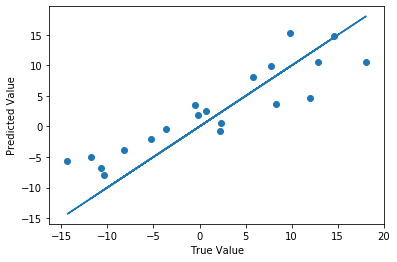

In [6]:
f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

axis.plot(y_test, y_test, '-')  # plot true vs true, i.e. the ideal case
axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
axis.set_ylabel('Predicted Value')
axis.set_xlabel('True Value')

plt.show()

## Advanced Task A.3

In the cell below we have put all this code into a loop. Using `np.arange` we have defined a range of sample sizes. Run the loop to see how sample size affects the results.

So far, these experiments have been magically noise free. Make `noNoise=False` and re-run the cell. How does noise affect the results?

Running for 20 samples...
Intercept 20.593101073145156
Slope [ 0.48061836 -5.46649572 -7.08571027]
Mean Absolute Error: 6.258682337720429
Mean Squared Error: 65.63993913468542
Root Mean Squared Error: 8.101847883951255


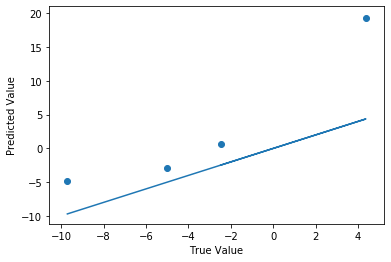

Running for 40 samples...
Intercept 10.328390185741524
Slope [ 1.29799371 -3.61590189 -7.04245289]
Mean Absolute Error: 3.5350128644023044
Mean Squared Error: 13.676032279494578
Root Mean Squared Error: 3.6981119885009672


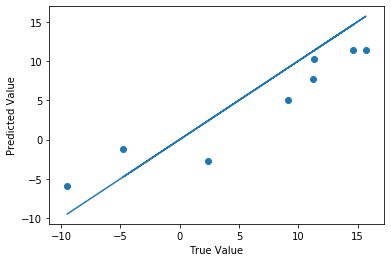

Running for 60 samples...
Intercept 15.316665634736824
Slope [ 1.03883173 -4.65976208 -7.1209584 ]
Mean Absolute Error: 4.094606702763996
Mean Squared Error: 33.2156457787555
Root Mean Squared Error: 5.763301638709838


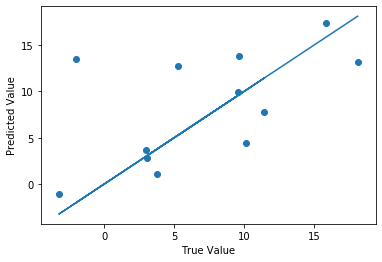

Running for 80 samples...
Intercept 13.605409166478044
Slope [ 1.09271196 -4.70446208 -5.08528173]
Mean Absolute Error: 2.5913985427205093
Mean Squared Error: 9.662692944682675
Root Mean Squared Error: 3.1084872437702997


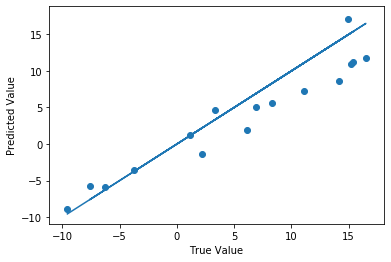

Running for 100 samples...
Intercept 14.079293724413837
Slope [ 1.05315375 -4.23373251 -7.84240978]
Mean Absolute Error: 4.5712223932935405
Mean Squared Error: 30.780480402861542
Root Mean Squared Error: 5.548015897855876


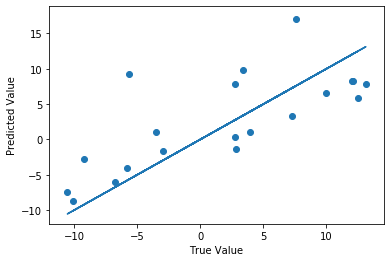

Running for 120 samples...
Intercept 13.03212560379956
Slope [ 1.13500428 -3.7712434  -9.73565963]
Mean Absolute Error: 3.3250968815015405
Mean Squared Error: 18.17443986051825
Root Mean Squared Error: 4.263149054457075


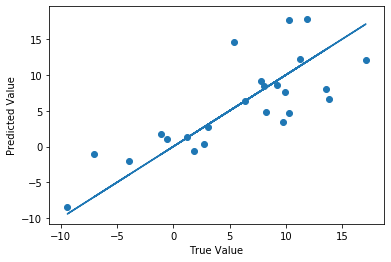

Running for 140 samples...
Intercept 13.521078174391931
Slope [ 1.00881746 -4.30847387 -6.70914099]
Mean Absolute Error: 3.205781661810953
Mean Squared Error: 17.929386724956657
Root Mean Squared Error: 4.234310655225554


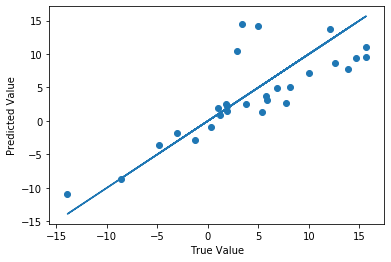

Running for 160 samples...
Intercept 13.572414053465254
Slope [ 1.01777528 -3.98315107 -8.63460416]
Mean Absolute Error: 3.5543666336866933
Mean Squared Error: 17.96417220980006
Root Mean Squared Error: 4.238416238384341


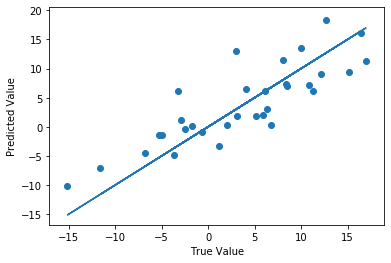

Running for 180 samples...
Intercept 12.670482159265987
Slope [ 0.88511631 -3.5587691  -7.52370497]
Mean Absolute Error: 3.46934970616651
Mean Squared Error: 15.120427922847897
Root Mean Squared Error: 3.888499443596192


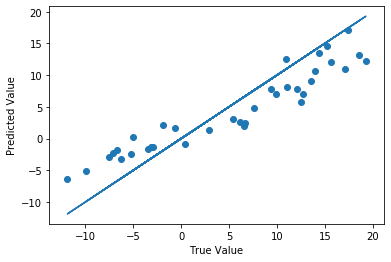

,MAE,MSE,RMS
20,6.25868,65.6399,8.10185
40,3.53501,13.676,3.69811
60,4.09461,33.2156,5.7633
80,2.5914,9.66269,3.10849
100,4.57122,30.7805,5.54802
120,3.3251,18.1744,4.26315
140,3.20578,17.9294,4.23431
160,3.55437,17.9642,4.23842
180,3.46935,15.1204,3.8885


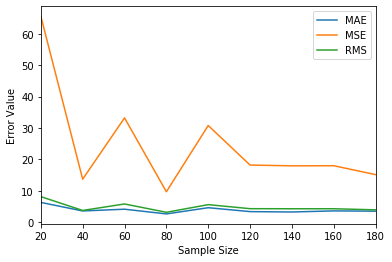

In [7]:
# We will store the error metrics for each sample size
errors = pd.DataFrame(index=np.arange(20, 200, 20),columns=['MAE', 'MSE', 'RMS'])

for number_of_samples in np.arange(20, 200, 20):
    print('Running for {0} samples...'.format(number_of_samples))
    problem = generateNiceData(3,number_of_samples,noNoise=True)
    
    #Data from pandas series needs to be converted to familiar numpy arrays
    x = problem.loc[:,['A','B','C']].values
    y = problem.loc[:,'Y'].values
    
    # Split test/train data
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Initialise Linear Regression Model
    mv_regression = linear_model.LinearRegression(normalize=True) #How would it perform without normalisation?
    
    # Fit regression model to feature data x_train and target y_train
    mv_regression.fit(x_train,y_train)
    
    # Fill vector y_predict with estimations of target y_predict from data x_test
    y_predict = mv_regression.predict(x_test)
    
    # Print Fit
    print("Intercept {}".format(mv_regression.intercept_))
    print("Slope {}".format(mv_regression.coef_))
    
    # Print Error Metrics
    results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
    print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
    errors.loc[number_of_samples,'MAE'] = metrics.mean_absolute_error(y_test, y_predict)
    print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
    errors.loc[number_of_samples,'MSE'] = metrics.mean_squared_error(y_test, y_predict)
    print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))
    errors.loc[number_of_samples,'RMS'] = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    
    # Plot
    f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)
    axis.plot(y_test, y_test, '-')  # plot true vs true, i.e. the ideal case
    axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
    axis.set_ylabel('Predicted Value')
    axis.set_xlabel('True Value')
    
    plt.show()
    
# Show errors and create a quick plot
display(errors)

fErr, axErr = plt.subplots(1,1)  # create a figure with a single axis (subplot)

errors.plot(ax=axErr)
axErr.set_ylabel('Error Value')
axErr.set_xlabel('Sample Size')

plt.show()

## Advanced Task A.4

Given your extensive knowledge of the property Y, you suspect that measurement B and C have a non-linear relation to Y. 

Modify the following cell to use function [np.power()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html) and [np.sin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html?highlight=sin#numpy.sin) to create additional non-linear features z_b and z_c. 

*Hint:* try different powers of `x_b`, from 2 to 8 to see when the fit is the closest. 

*Hint:* Apply sine function firectly to `x_c: z_c = np.sin(x_c)`

In [8]:
x_a = problem.loc[:,['A']].values
x_b = problem.loc[:,['B']].values
x_c = problem.loc[:,['C']].values

#z_b = x_b
#z_c = x_c 

z_b = np.power(x_b,4)
z_c = np.sin(x_c)

#You can either add z-features to your existing measurements, or replace x_b and x_c with the non-linear features.
x=np.concatenate((x_a,x_b,x_c,z_b,z_c),axis=1)
x=np.concatenate((x_a,z_b,z_c),axis=1)

## Advanced Task A.5

Copy the code from the cells above (task A.2) to try linear regression with your non-linear features. Do you need to change anything?

## Advanced Task A.6

Display the results on the test dataset by executing the following cell

Mean Absolute Error: 3.46934970616651
Mean Squared Error: 15.120427922847897
Root Mean Squared Error: 3.888499443596192


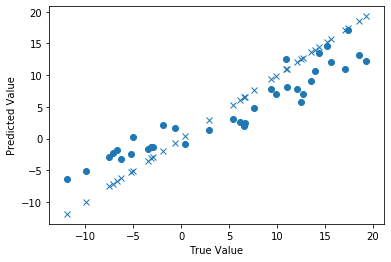

In [9]:
from sklearn import metrics

results = pd.DataFrame({'True value': y_test.flatten(), 'Predicted': y_predict.flatten()})
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_predict))  )
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_predict)) )
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

import matplotlib.pyplot as plt

f, axis = plt.subplots(1,1)  # create a figure with a single axis (subplot)

axis.plot(y_test, y_test, 'x')  # plot true vs true, i.e. the ideal case
axis.scatter(y_test,y_predict)  # plot a scatter of the true value against the prediction value
axis.set_ylabel('Predicted Value')
axis.set_xlabel('True Value')

plt.show()